<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/CASE_STUDY_ON_UNSUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the dataset

In [233]:
import pandas as pd

In [234]:
Data=pd.read_csv('/content/Wholesale customers data.csv')

In [235]:
Data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#Preprocessing

In [236]:
#checking the missing values
Data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [237]:
#checking duplicates
Data.duplicated().sum()

np.int64(0)

In [238]:
Data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [239]:
#checking the skewness
Data[num_cols].select_dtypes('number').skew()

,0
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


The data are highly skewed so performing log transform not performing onehot because valueable data get lost

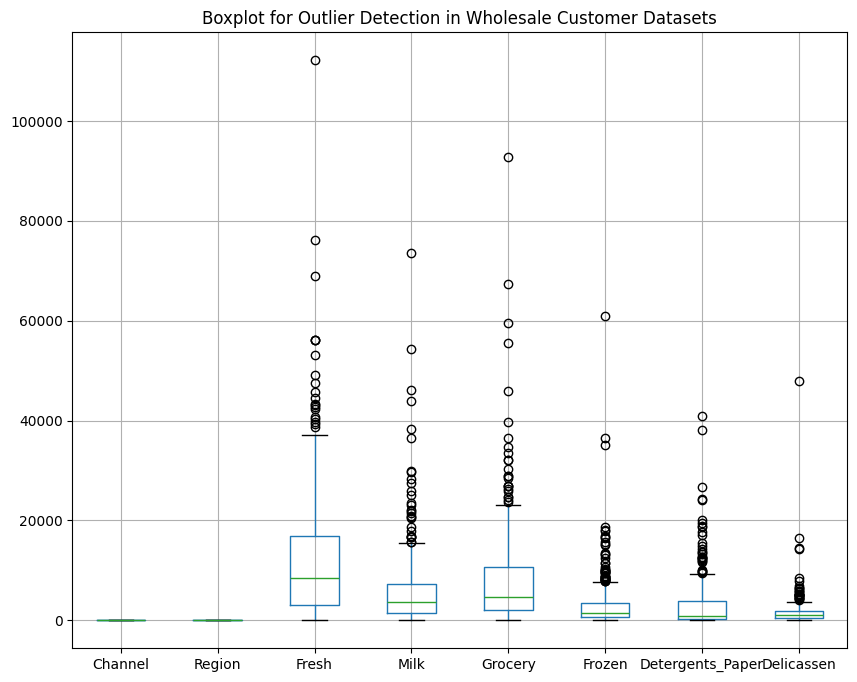

In [240]:
#boxplotof entire dataset
import seaborn as sns
import matplotlib.pyplot as plt
# Drawing boxplot for all numerical columns in the dataset
Data.boxplot(figsize=(10, 8))

# Adding a title to clearly specify the purpose of the plot
plt.title('Boxplot for Outlier Detection in Wholesale Customer Datasets')

# Displaying the plot
plt.show()


In [241]:
#Storing the numerical columns to a variable
#not including the channel and region because the are more like categorical not continuous numerical data
num_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [242]:
Reg_cha=['Region','Channel']

In [243]:
#Applying log transform
import numpy as np
import matplotlib.pyplot as plt

Data[num_cols]=Data[num_cols].apply(lambda x:np.log1p(x))

In [244]:
#checking the skewness after appling log transformation
Data[num_cols].select_dtypes('number').skew()

,0
Fresh,-1.575326
Milk,-0.224063
Grocery,-0.674938
Frozen,-0.352655
Detergents_Paper,-0.235961
Delicassen,-1.091827


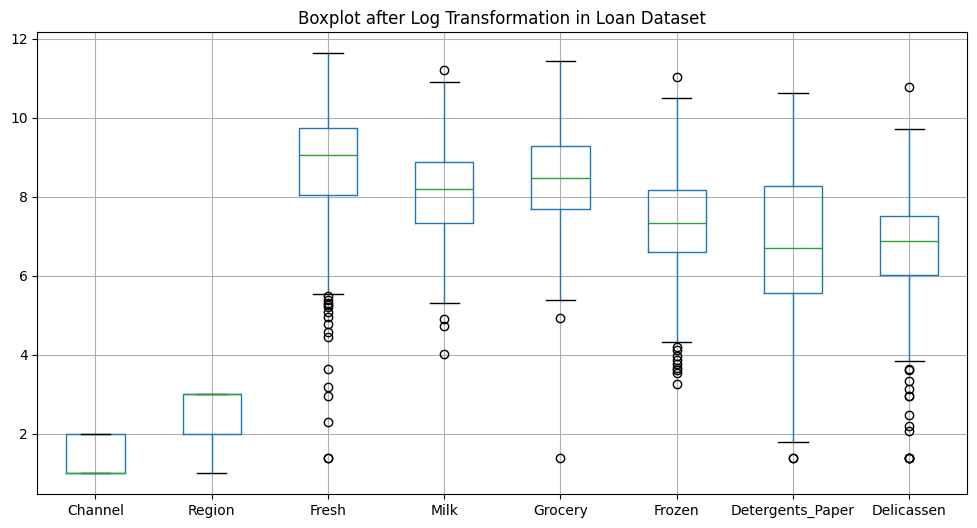

In [245]:
# Drawing boxplot for all numerical columns in the dataset
Data.boxplot(figsize=(12,6))

# Adding a title to clearly specify the purpose of the plot
plt.title("Boxplot after Log Transformation in Loan Dataset")

# Displaying the boxplot
plt.show()

Outliers/skewness are reduced to an extend

<Axes: >

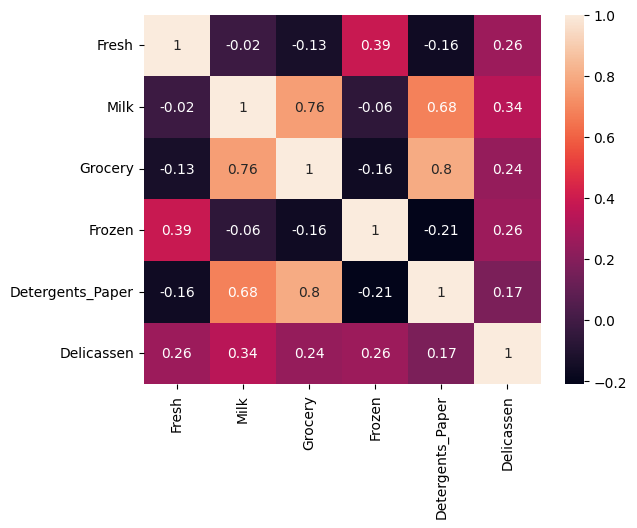

In [246]:
#check the correlation draw the heat map

sns.heatmap(round(Data[num_cols].corr(), 2), annot=True)

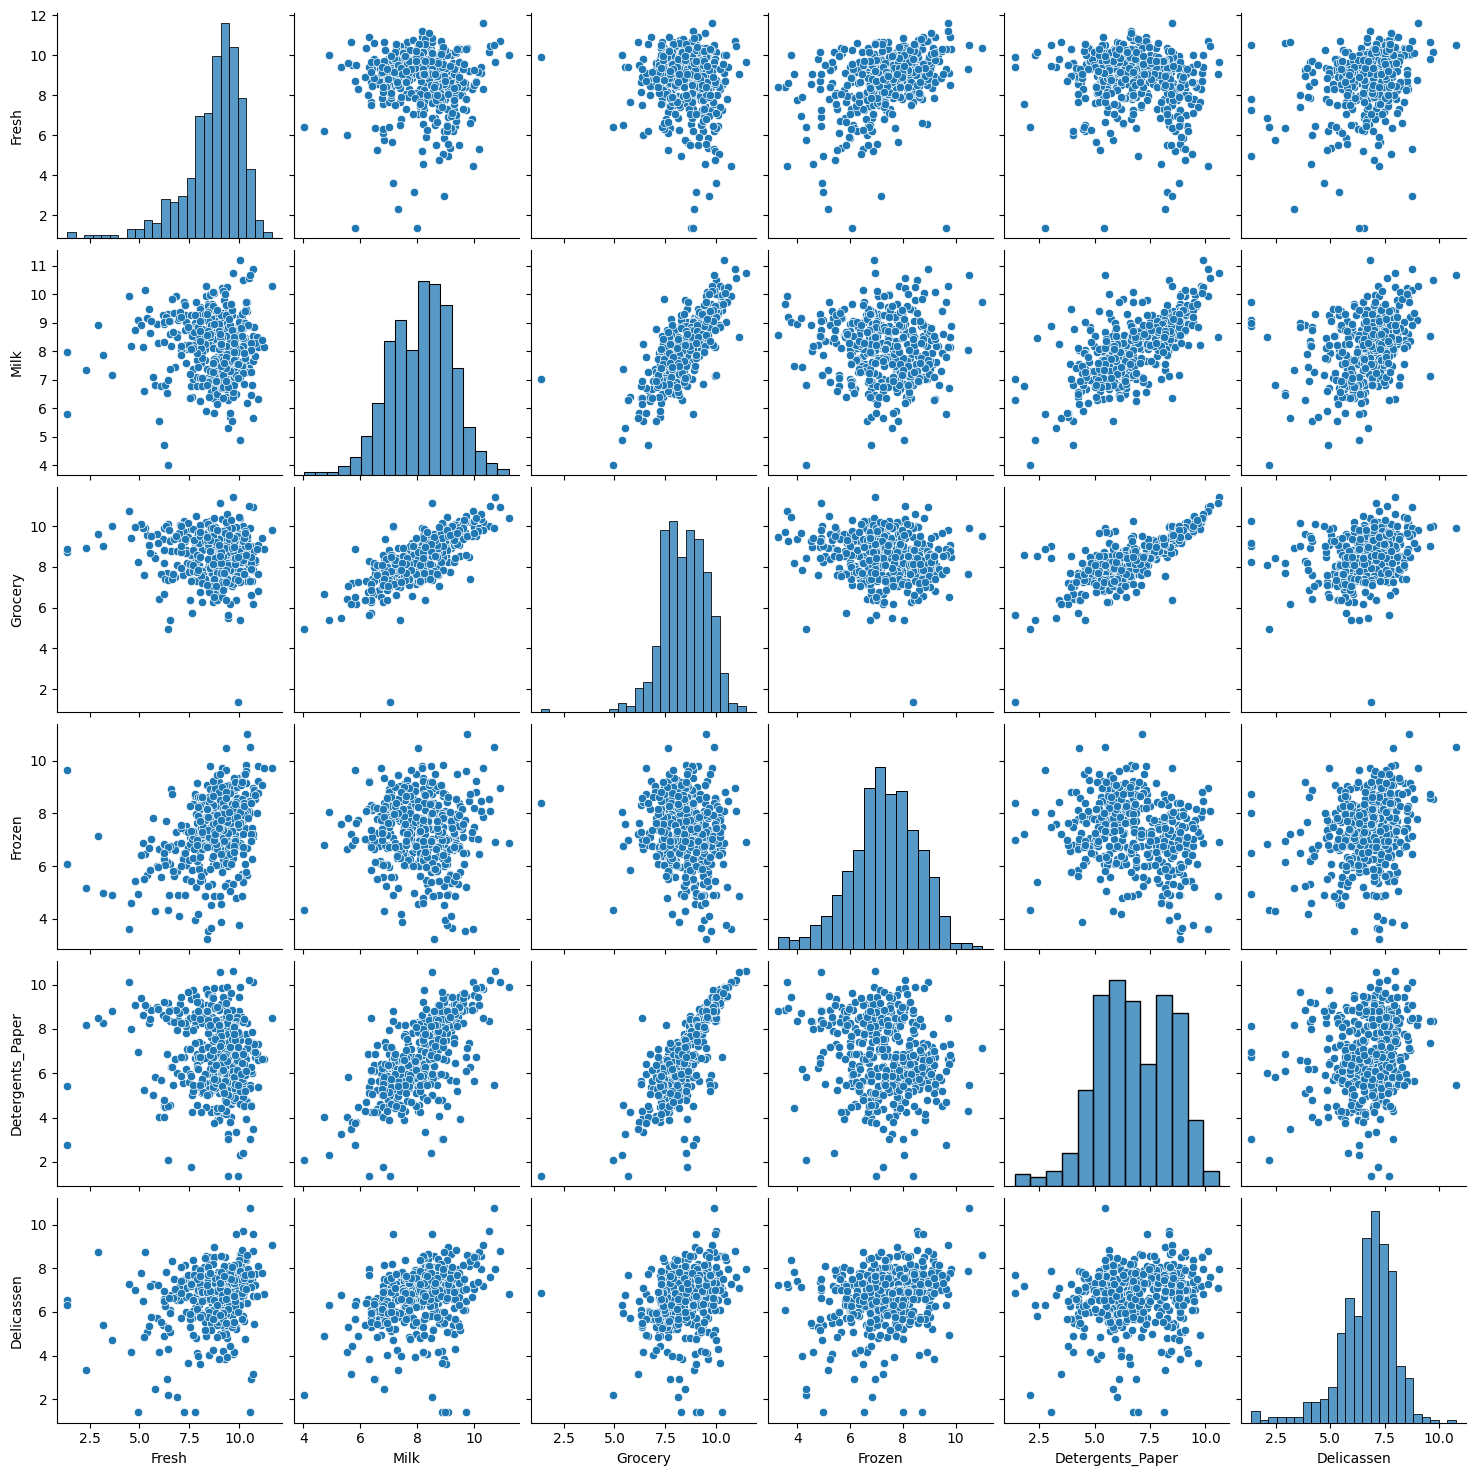

In [247]:
#Pairplot
sns.pairplot(Data[num_cols])

#Scaling

In [248]:
# Create DataFrame for scaled features
Data = pd.DataFrame(Data, columns=num_cols)

In [249]:
Data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [250]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Data[num_cols]=scaler.fit_transform(Data[num_cols])

In [251]:
Data[num_cols]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.486184,0.976299,0.440155,-1.509250,0.644143,0.408966
1,0.087889,0.990956,0.652171,0.134052,0.766043,0.627926
2,0.016356,0.891151,0.454687,0.376899,0.804405,1.776833
3,0.517477,-0.957973,-0.084792,1.141574,-0.328712,0.633133
4,0.880631,0.439662,0.395847,0.757322,0.404939,1.456588
...,...,...,...,...,...,...
435,1.066222,1.181548,1.116754,1.702540,-0.926632,0.794891
436,1.255565,-0.791906,-1.623340,0.867791,-1.316771,0.843179
437,0.579528,1.413991,1.688657,-0.953514,1.647619,0.666566
438,0.344609,-0.490783,-0.658498,-0.278901,-0.973241,0.766663


#Clustering

#KMeans

In [252]:
#kmeans clustering
from sklearn.cluster import KMeans
# Step 1: Initial K-Means trial (example with 3 clusters)

kmeans_trial = KMeans(n_clusters=3, init='k-means++', random_state=42)
Data['Trial_Cluster'] = kmeans_trial.fit_predict(Data)

print("Initial K-Means trial cluster counts:")
print(Data['Trial_Cluster'].value_counts())


Initial K-Means trial cluster counts:
Trial_Cluster
1    216
2    143
0     81
Name: count, dtype: int64


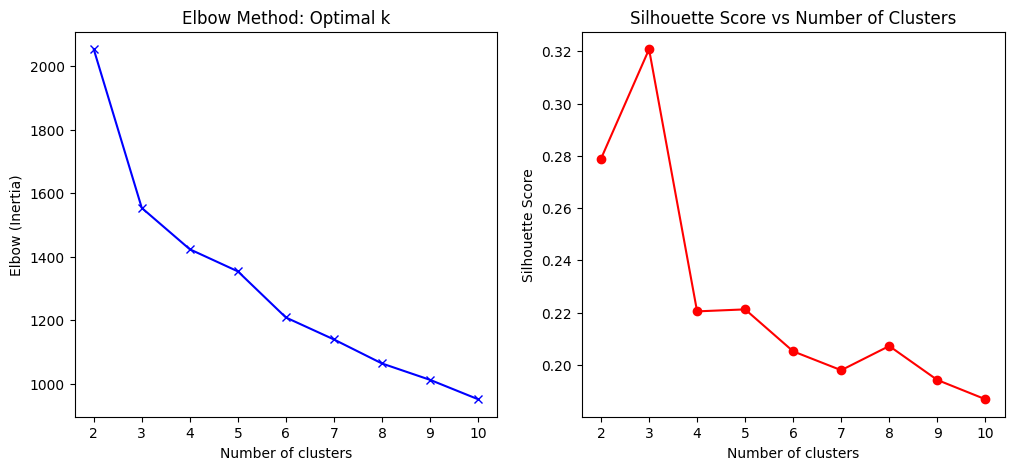

In [253]:

# Step 2: Determine optimal number of clusters
from sklearn.metrics import silhouette_score

Elb = []  # Sum of Squared Errors (Elbow)
sil = []  # Silhouette scores
K = range(2, 11)  # Test cluster sizes from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(Data)
    Elb.append(kmeans.inertia_)
    sil.append(silhouette_score(Data, labels))

# Plot Elbow & Silhouette
plt.figure(figsize=(12,5))

# Elbow plot
plt.subplot(1,2,1)
plt.plot(K, Elb, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow (Inertia)')
plt.title('Elbow Method: Optimal k')

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, sil, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.show()


In [254]:
# Step 3: Final K-Means with optimal k

best_k = 3  # Example: pick k based on Elbow/Silhouette
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)

Data['Final_Cluster'] = kmeans_final.fit_predict(Data)

# Step 4: Evaluate clustering using Silhouette score

silhouette_avg = silhouette_score(Data, Data['Final_Cluster'])
print("Silhouette Score for final K-Means clustering:", silhouette_avg)



# Step 5: Cluster profiling


cluster_profile = Data.groupby('Final_Cluster')[num_cols].mean()
print("Cluster profile (mean values per cluster):")
print(cluster_profile)


Silhouette Score for final K-Means clustering: 0.3588753534612643
Cluster profile (mean values per cluster):
                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Final_Cluster                                                             
0             -1.207348  0.442931  0.641743 -1.151200          0.734746   
1              0.197880 -0.709081 -0.748217  0.225139         -0.746802   
2              0.384986  0.820168  0.766669  0.312009          0.711852   

               Delicassen  
Final_Cluster              
0               -0.690353  
1               -0.185877  
2                0.671804  


#DBSCAN

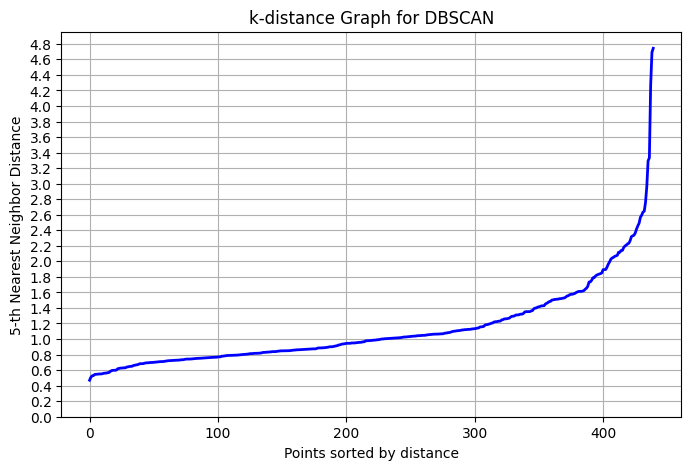

In [255]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#  k-distance graph to choose eps

min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(Data)
distances, indices = neighbors_fit.kneighbors(Data)

k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,5))
plt.plot(k_distances, color='blue', lw=2)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-distance Graph for DBSCAN')
plt.grid(True)
plt.yticks(np.arange(0, max(k_distances)+0.1, 0.2))
plt.show()

In [256]:


#  DBSCAN Trial

eps_trial = 0.8
db_trial = DBSCAN(eps=eps_trial, min_samples=min_samples)
Data['DBSCAN_Trial'] = db_trial.fit_predict(Data)

# Count clusters and noise points
trial_labels = Data['DBSCAN_Trial']
n_clusters_trial = len(set(trial_labels)) - (1 if -1 in trial_labels else 0)
n_noise_trial = list(trial_labels).count(-1)

print(f"DBSCAN Trial (eps={eps_trial})")
print(f"Number of clusters: {n_clusters_trial}")
print(f"Number of noise points: {n_noise_trial}")


DBSCAN Trial (eps=0.8)
Number of clusters: 5
Number of noise points: 245


In [257]:
#  DBSCAN Final (Optimal)

eps_final = 1.0  # Adjusted after trial observation
db_final = DBSCAN(eps=eps_final, min_samples=min_samples)
Data['DBSCAN_Optimal'] = db_final.fit_predict(Data)

# Count clusters and noise points
final_labels = Data['DBSCAN_Optimal']
n_clusters_final = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise_final = list(final_labels).count(-1)

print(f"\nDBSCAN Final / Optimal (eps={eps_final})")
print(f"Number of clusters: {n_clusters_final}")
print(f"Number of noise points: {n_noise_final}")



DBSCAN Final / Optimal (eps=1.0)
Number of clusters: 9
Number of noise points: 200


In the trial DBSCAN with eps = 0.8, there were 6 clusters and a lot of points (245) were treated as noise. After increasing eps to 1.0, got 10 clusters and fewer noise points (200), so more points joined meaningful clusters. This shows that changing eps can help find better groups and reduce outliers in the data.

#PCA

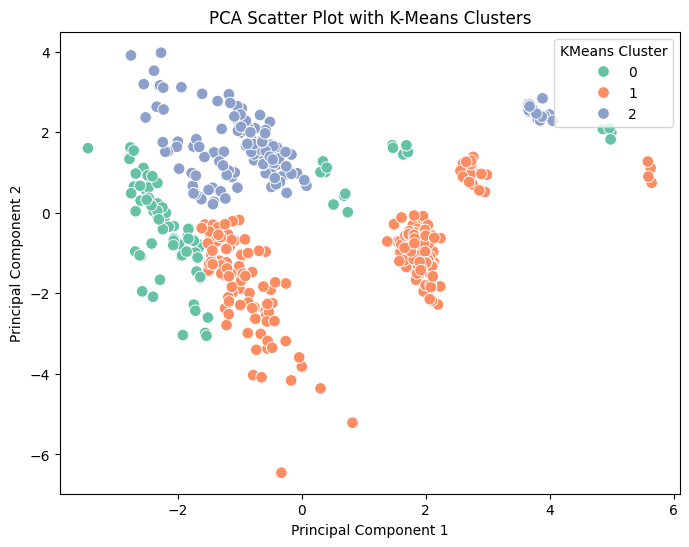

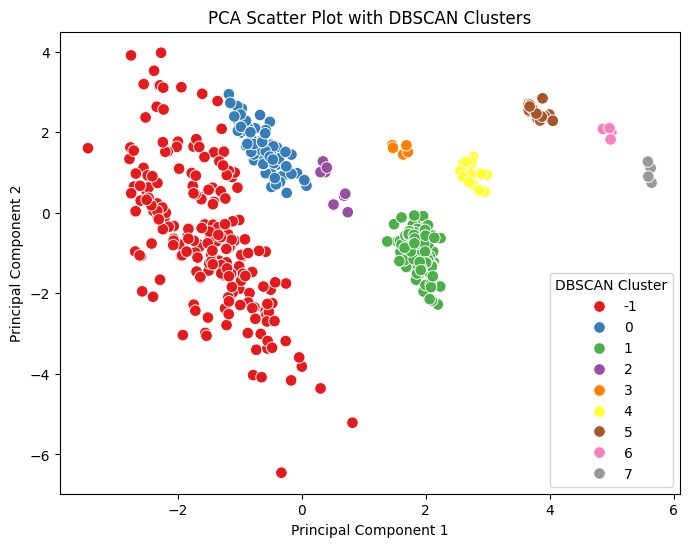

In [258]:
# PCA - reduce to 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(Data)
pca_df = pd.DataFrame(pca_data, columns=['PC1','PC2'])


#  PCA Scatter Plots with Clusters

# K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=Data['Final_Cluster'], palette='Set2', s=70, data=pca_df)
plt.title('PCA Scatter Plot with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='KMeans Cluster')
plt.show()

# DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=Data['DBSCAN_Optimal'], palette='Set1', s=70, data=pca_df)
plt.title('PCA Scatter Plot with DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.show()

Based on the graphs, the K-Means plot organizes the data into three large, distinct groups. In contrast, the DBSCAN plot identifies several smaller, more specific clusters, and it also leaves many points unclustered, treating them as noise.

#  Hierarchical Clustering Dendrogram


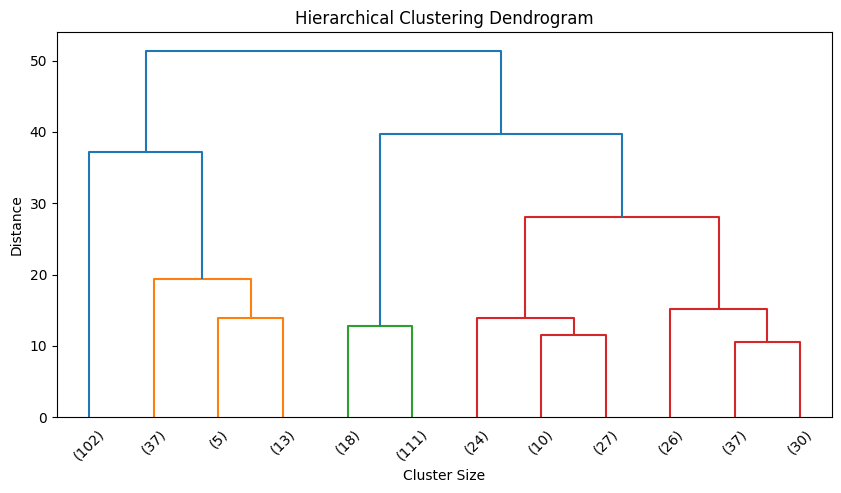

In [259]:
#  Hierarchical Clustering Dendrogram

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(Data, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()
